<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Homework 1: Linear Regression </h1>
    <h3></h3>
</center>

### 1. Background of problem

Predict the relationship between the years of experience and income of professionals in the financial industry, and plot the linear regression curve. Notably, it is required to establish both a univariate linear regression equation and a univariate quadratic regression equation, and analyze and compare the MSE and the R-squared values of the prediction models.

### 2. Linear Regression for the Case

#### 2.1 Data processing

In [87]:
import pandas as pd
import numpy as np
df = pd.read_excel('Salary of the financial industry.xlsx')
df.head()  # 显示前5行数据

,Working years,Salary
0,0.0,9534
1,0.1,11667
2,0.2,11015
3,0.3,10347
4,0.3,11110


In [88]:
X = df[['Working years']]
Y = df['Salary']
print(df.dtypes)

Working years    float64
Salary             int64
dtype: object


Text(0, 0.5, 'Salary')

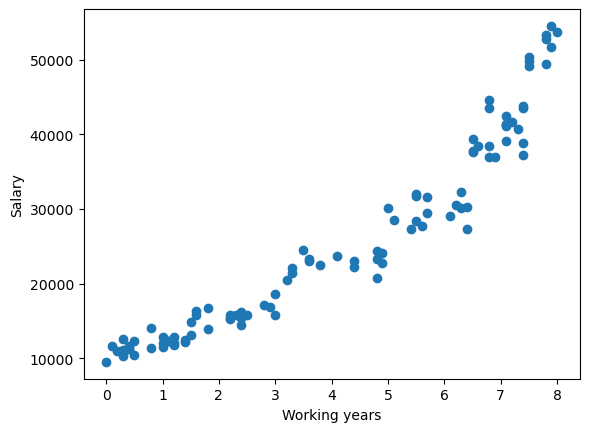

In [89]:
# Visualize the distribution of raw data
from matplotlib import pyplot as plt  # pip install matplotlib
plt.scatter(X,Y)
plt.xlabel('Working years')
plt.ylabel('Salary')
# plt.show()

In [90]:
from sklearn.model_selection import train_test_split

# obtain training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, shuffle=True)

In [91]:
# Sort according to the index of the dataframe in the training and testing datasets, to avoid issues when plotting the regression curve later.
import numpy as np
import copy
def sort_dataframe(x_frame, y_frame):
    data_train_list = []
    label_train_list = []

    data_train = x_frame.to_numpy().reshape(-1)
    label_train = y_frame.to_numpy().reshape(-1)

    seq_train = x_frame.index.to_numpy()
    record_train = copy.deepcopy(seq_train)
    record_train.sort()
    for i in record_train:
        loc=np.where(seq_train == i)
        data_train_list.append(data_train[loc])
        label_train_list.append(label_train[loc])
    return data_train_list, label_train_list

X_train, y_train = sort_dataframe(X_train, y_train)
X_test, y_test = sort_dataframe(X_test, y_test)

#### 2.2 Model training and prediction

In [92]:
# Build a linear regression model and fit the data

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
print('斜率:', model.coef_)
print('截距:', model.intercept_)

斜率: [[4708.58002297]]
截距: [6782.68607969]


In [93]:
# Prediction
y_pred = model.predict(X_test)

#### 2.3 Performance metrics

In [94]:
# Calculate R-squared
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('均方误差:', MSE)
print('R方:', r2)

均方误差: 18994193.53882953
R方: 0.8882935978629171


#### 2.4 Visualizing results

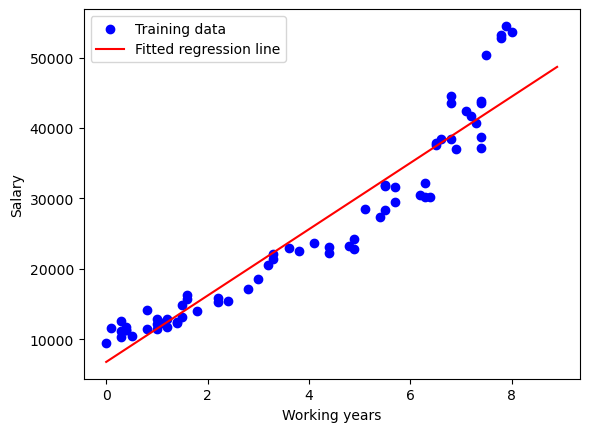

In [95]:
# Plot the fitted regression line on the training dataset.
from matplotlib import pyplot as plt
x_label = np.arange(0,max(X_train)[0]+1,0.1).reshape(-1,1)
y_label = model.predict(x_label)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(x_label, y_label, color='red', label='Fitted regression line')
plt.xlabel('Working years')
plt.ylabel('Salary')
plt.legend()
plt.show()

#### 2.5 Construction of the Linear Regression Equation

In [96]:
print('The weight coefficient is: ' + str(model.coef_[0]))
print('The bias coefficient is: ' + str(model.intercept_))

The weight coefficient is: [4708.58002297]
The bias coefficient is: [6782.68607969]


Thus, the equation of the fitted linear regression curve is: y = 6782.69 x + 4708.58

### 3. Polynomial Linear Regression Model for the Case

Looking at the pic. of the raw datas, we can see a rough trend that y is proportional to the x square, which motivates us to seek for Univariate Polynomial Linear Regression Model.

In [97]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [98]:
# Build a linear regression model and fit the data
model_2 = LinearRegression(fit_intercept=True)
model_2.fit(X_train_poly, y_train)
print('斜率:', model_2.coef_)
print('截距:', model_2.intercept_)

斜率: [[  0.          23.45335651 593.03665376]]
截距: [11878.26575434]


In [99]:
# Prediction
y_pred2 = model_2.predict(X_test_poly)

In [100]:
# Calculate R-squared and mean squared error

r2_poly = r2_score(y_test, y_pred2)
MSE_poly = mean_squared_error(y_test, y_pred2)
print('R方:', r2_poly)
print('均方误差:', MSE_poly)

R方: 0.9474105492757113
均方误差: 8942139.26908203


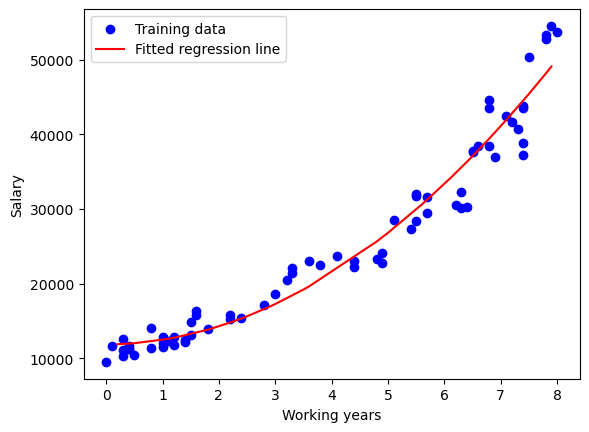

In [101]:
# Plot the fitted regression line on the training dataset.

plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_test, y_pred2, color='red', label='Fitted regression line')
plt.xlabel('Working years')
plt.ylabel('Salary')
plt.legend()
plt.show()

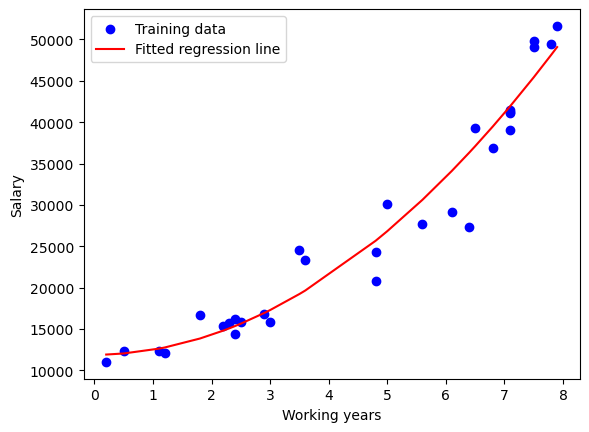

In [102]:
# Plot the fitted regression line on the testing dataset.

plt.scatter(X_test, y_test, color='blue', label='Training data')
plt.plot(X_test, y_pred2, color='red', label='Fitted regression line')
plt.xlabel('Working years')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [103]:
print('The weight coefficient is: ' + str(model_2.coef_))
print('The bias coefficient is: ' + str(model_2.intercept_))

The weight coefficient is: [[  0.          23.45335651 593.03665376]]
The bias coefficient is: [11878.26575434]


Thus the equation of the Polynomial Linear Regression Line is y = 11878.27 + 23.45 x + 593.03 x^2

### 4. Regularization

#### 4.1 L1 regularization of univariate linear regression

In [104]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.1, fit_intercept=True, copy_X=True)

In [105]:
# fit the data
model_lasso.fit(X_train, y_train)
print('The weight coefficient is: ' + str(model_lasso.coef_))
print('The bias coefficient is: ' + str(model_lasso.intercept_))

The weight coefficient is: [4708.56575582]
The bias coefficient is: [6782.74306675]


In [106]:
# prediction
y_pred_lasso = model_lasso.predict(X_test)

In [107]:
# Calculate R-squared value and mean squared error
from sklearn.metrics import mean_squared_error, r2_score
MSE=mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print('均方误差:', MSE)
print('R方:', r2_lasso)

均方误差: 18994244.83559593
R方: 0.888293296182448


#### 4.2 L2 regularization of univariate linear regression

In [108]:
# build a linear regression model with L2 regularization
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=0.1,fit_intercept=True,copy_X=True)

In [109]:
# fit the data
model_ridge.fit(X_train, y_train)
print('The weight coefficient is: ' + str(model_ridge.coef_))
print('The bias coefficient is: ' + str(model_ridge.intercept_))

The weight coefficient is: [4707.62053282]
The bias coefficient is: [6786.51855748]


In [110]:
# predict
y_pred_ridge = model_ridge.predict(X_test)

In [111]:
# Calculate R-squared and mean squared error
from sklearn.metrics import mean_squared_error, r2_score
MSE=mean_squared_error(y_test,y_pred_ridge)
R2=r2_score(y_test,y_pred_ridge)
print("mean_squared_error:",MSE)
print("r2_score:",R2)

mean_squared_error: 18997648.95038965
r2_score: 0.8882732763055687


### *Appendix: Code of homework_1, Question 5 (multiple linear regression)

#### Step 1: Data processing

In [112]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
data = {
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 1, 4, 3, 5],
    'Y': [5, 5, 11, 11, 15]
}
df = pd.DataFrame(data)

#### Step 2: Multiple linear regression & Calculation of R-squared value

In [114]:
X = df[['X1', 'X2']]
y = df['Y']

model = LinearRegression()
model.fit(X, y)

r2 = model.score(X, y)
print("R-square value:", r2)

R-square value: 0.9988179669030732


#### Step 3: Visualizing

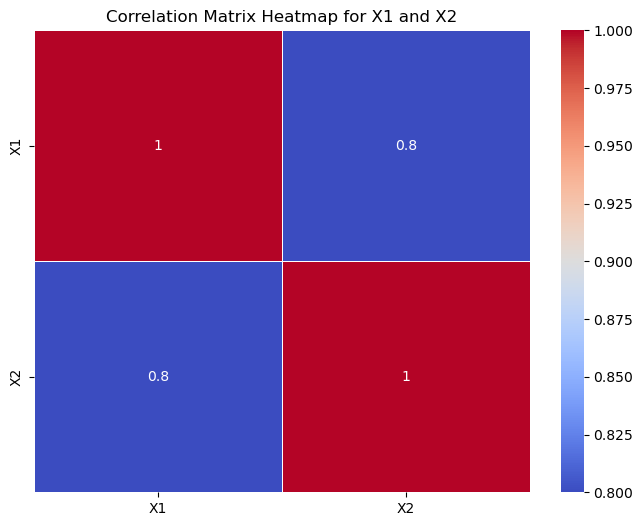

In [118]:
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix Heatmap for X1 and X2')
plt.show()

#### Step 4: Obtain linear regression line

In [119]:
# 输出回归系数和截距
coefficients = model.coef_
intercept = model.intercept_

print(f"Fitted linear regression curve: Y = {intercept:.2f} + {coefficients[0]:.2f}*X1 + {coefficients[1]:.2f}*X2")

Fitted linear regression curve: Y = 0.73 + 1.44*X1 + 1.44*X2


#### Visualizing (2)

C:\Users\LiuYuchen\AppData\Local\Temp\ipykernel_12244\1541709810.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


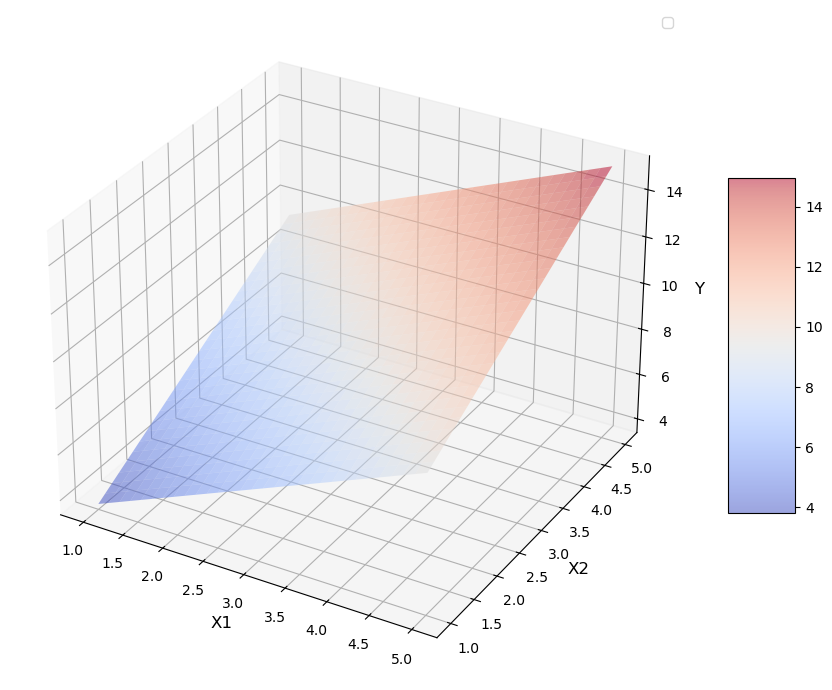

In [124]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x1_range = np.linspace(df['X1'].min(), df['X1'].max(), 30)
x2_range = np.linspace(df['X2'].min(), df['X2'].max(), 30)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)

Y_pred = intercept + coefficients[0] * X1_grid + coefficients[1] * X2_grid

surf = ax.plot_surface(X1_grid, X2_grid, Y_pred, cmap='coolwarm', alpha=0.5)

ax.set_xlabel('X1', fontsize=12)
ax.set_ylabel('X2', fontsize=12)
ax.set_zlabel('Y', fontsize=12)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.legend()
plt.tight_layout()
plt.show()